In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MWE of error in xgcm and ECCO

In [46]:
import xarray as xr
from xgcm import Grid

In [52]:
rootdir = '/Users/graemem/Documents/research/data/ECCO/v4r4/'

In [53]:
# shortwave
localdir = 'nctiles_monthly/MXLDEPTH/*/'
filename = 'MXLDEPTH_*.nc'
ds = xr.open_mfdataset(rootdir+localdir+filename)
ds = ds.rename({'tile':'face'})

In [54]:
localdir = 'nctiles_grid/'
filename = 'ECCO-GRID.nc'
grid = xr.open_dataset(rootdir+localdir+filename)
grid = grid.rename({'tile':'face'})

In [59]:
ds = xr.merge([ds,grid])

In [56]:
# define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

# create the grid object
xgrid = Grid(ds, periodic=False, face_connections=face_connections)
xgrid

<xgcm.Grid>
X Axis (not periodic, boundary=None):
  * center   i
Y Axis (not periodic, boundary=None):
  * center   j
T Axis (not periodic, boundary=None):
  * center   time

In [58]:
# Calculate gradients in field
dg = xgrid.diff(ds['MXLDEPTH'], 'X')
dgx = xgrid.interp(dg ,'X')

KeyError: 'center'

In [28]:
dg

<xarray.DataArray 'sub-37c24a2892d543d2fa26d1415cf1a680' (time: 1, face: 13, j: 90, i_g: 90)>
dask.array<sub, shape=(1, 13, 90, 90), dtype=float32, chunksize=(1, 1, 90, 89), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1992-01-16T12:00:00
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89

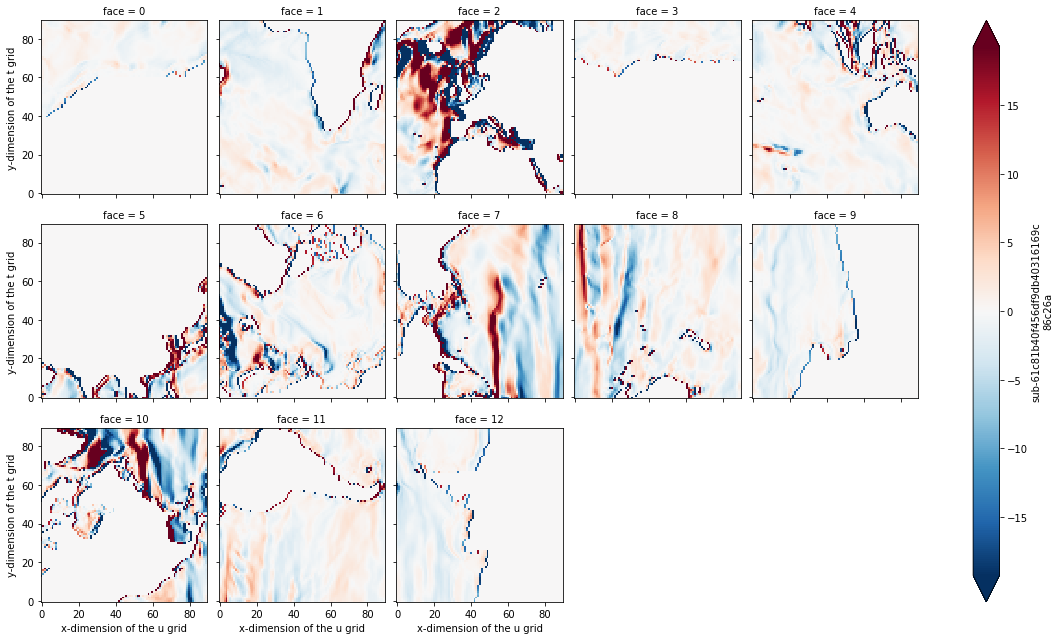

In [47]:
dg.isel(time=0).plot(col='face', col_wrap=5, robust = True)

In [47]:
gxg = xgrid.interp(dg ,'Y', boundary = 'fill')

ValueError: 'i' not found in array dimensions ('time', 'face', 'j', 'i_g')